In [1]:
import game

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

import agent

In [2]:
def visualize(stateHistory, actionHistory, rewardHistory, N):
    inventory = stateHistory[:, 0, :]
    orders = actionHistory[:, 1, :]
    serviceTimes = actionHistory[:, 0, :]
    reorderPoints = stateHistory[:, 1, :]
    
    print("Time Series")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        
        alpha = 1 if i == 2 else 0.3
#         plt.step(range(N+1), inventory[:, i] * np.roll(np.sign(orders[:, i]), -1), label="inventory")        
        plt.plot(range(N+1), inventory[:, i], label="inventory", alpha=alpha, c='b', linestyle='--', drawstyle='steps')
        plt.step(range(N+1), orders[:, i], label="order quantity", c='orange')
        if i == 2:
            plt.step(range(N+1), reorderPoints[:, i], label="reorder point", c='green')
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Service Time")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), serviceTimes[:, i], label="service time")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    
    print("Inventory")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), inventory[:, i] * np.sign(orders[:, i]), label="inventory")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Rewards")
    plt.figure(figsize=(20, 4))
    plt.step(range(N+1), rewardHistory)
    plt.show()

# single experiment

In [3]:
# learningParams = {
#     "gamma": 0.2,
#     "alpha": 0.8, #1,
#     "epsilon": 0.5
# }

# envParams = {
#     "inventoryCost": [5, 1000, 1000], #[1000, 5, 1000],
#     "muDemand": 2,
#     "stdDemand": 0.1, #1,
#     "retailerOrder": 10, #20, #
#     "stockoutCost": 10000,
#     "N": 1000
# }

In [4]:
# # create central planner
# plannerAgent = agent.Planner(learningParams, envParams["retailerOrder"])

In [5]:
# # play the game while training
# stateHistory, actionHistory, rewardHistory, _ = game.runEpisode(envParams, plannerAgent, train=True)

# visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])

In [6]:
# rewardsAll = []
# for _ in tqdm(range(5000)):
# # play the game while training
#     _, _, rewards, _ = game.runEpisode(envParams, plannerAgent, train=True)
#     averageRewards = np.nansum(rewards)/np.count_nonzero(~np.isnan(rewards))
#     rewardsAll.append(averageRewards)

In [7]:
# plt.figure(figsize=(10, 5))
# plt.plot(rewardsAll)

In [8]:
# # play the game while training
# plannerAgent.epsilon = 0
# envParams["N"] = 1000
# stateHistory, actionHistory, rewardHistory, _ = game.runEpisode(envParams, plannerAgent, train=False)
# visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])

In [9]:
# plannerAgent.q.obj

# multiple experiments

In [10]:
from tqdm import tqdm_notebook

In [11]:
learningParams = {
    "gamma": 0.2,
    "alpha": 0.8,
    "epsilon": 0.5
}

envParams = {
    "inventoryCost": [5, 1000, 1000], #[1000, 5, 1000], #
    "muDemand": 2,
    "stdDemand": 0.1, #0, #
    "retailerOrder": 10,
    "stockoutCost": 10000, #50000,
    "N": 1000
}

In [12]:
NSimulation = 10
NGame = 1000 #5000

reorderPointsAll = []
meanReorderPoints = []
node0InventoriesAll = []
node0InventoryMeans = []
node1InventoriesAll = []
node1InventoryMeans = []
rewardsAll = []
rewardMeans = []
for _ in range(NSimulation):
    # create central planner
    plannerAgent = agent.Planner(learningParams, envParams["retailerOrder"])

    # training
    for _ in tqdm_notebook(range(NGame)):
        game.runEpisode(envParams, plannerAgent, train=True)
    
    # test
    plannerAgent.epsilon = 0
    stateHistory, actionHistory, rewardHistory, _ = game.runEpisode(envParams, plannerAgent, train=False)
        
    # note reorder point
    reorderPoints = stateHistory[:, 1, 2]
    reorderPointsAll.append(reorderPoints)
    meanReorderPoint = reorderPoints.mean()
    meanReorderPoints.append(meanReorderPoint)

    
    orders = actionHistory[:, 1, :]

    # note inventories 0
    node0Inventories = stateHistory[:, 0, 0] 
    node0InventoriesAll.append(node0Inventories)
    # consider inventory before order
    filterInv = np.roll(np.sign(orders[:, 0]), -1)
    node0Inventories = node0Inventories[np.where(filterInv == 1)]
    node0InventoryMean = node0Inventories.mean() if (len(node0Inventories) > 0) else 0
    node0InventoryMeans.append(node0InventoryMean)
    
    # note inventories 1
    node1Inventories = stateHistory[:, 0, 1] 
    node1InventoriesAll.append(node1Inventories)
    # consider inventory before order
    filterInv = np.roll(np.sign(orders[:, 1]), -1)
    node1Inventories = node1Inventories[np.where(filterInv == 1)]
    node1InventoryMean = node1Inventories.mean() if (len(node1Inventories) > 0) else 0
    node1InventoryMeans.append(node1InventoryMean)
    
    # reward
    rewardsAll.append(rewardHistory)
    rewardMean = np.nanmean(rewardHistory)
    rewardMeans.append(rewardMean)
    
    print(node0InventoryMean, node1InventoryMean, meanReorderPoint, rewardMean)


11.609756097560975 2.4558823529411766 3.9740259740259742 -12501.464285714286



12.360655737704919 1.8865248226950355 3.8931068931068933 -12813.978873239437



10.508474576271187 2.4814814814814814 4.067932067932068 -14677.610294117647



11.258620689655173 2.259259259259259 4.081918081918082 -14040.392857142857



11.361344537815127 2.253731343283582 3.6863136863136865 -14901.304347826086



11.203389830508474 2.5073529411764706 3.7482517482517483 -13199.82269503546



11.40677966101695 1.7285714285714286 4.421578421578421 -12936.514084507042



10.179487179487179 2.857142857142857 3.913086913086913 -14673.156028368794



10.675213675213675 2.4074074074074074 3.937062937062937 -12897.323943661971



10.774774774774775 2.3059701492537314 4.025974025974026 -12673.525179856115


{'inventoryCost': [5, 1000, 1000], 'muDemand': 2, 'stdDemand': 0.1, 'retailerOrder': 10, 'stockoutCost': 10000, 'N': 1000} NGame = 1000


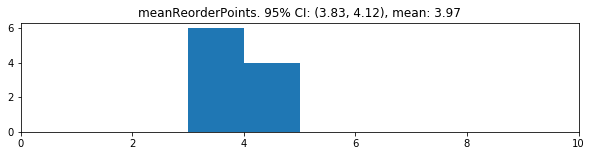

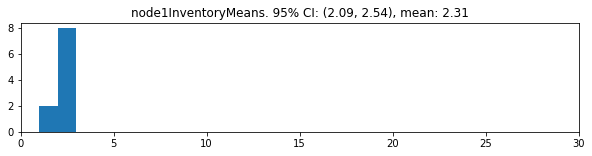

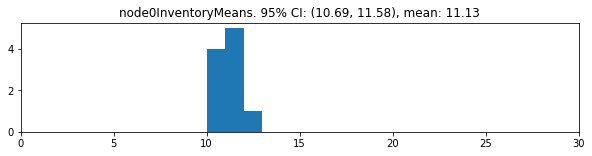

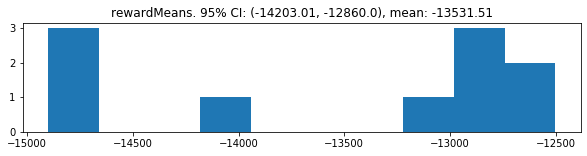

In [13]:
# confidence interval
import scipy.stats as st

def ci(a):
    mean = np.mean(a)
    # get confidence interval
    lowerLim, upperLim = st.t.interval(0.95, len(a)-1, loc=mean, scale=st.sem(a))

    lowerLim = round(lowerLim, 2)
    mean = round(mean, 2)
    upperLim = round(upperLim, 2)
    
    return lowerLim, mean, upperLim


print(envParams, "NGame = {}".format(NGame))

plt.figure(figsize=(10, 2))
lowerLim, mean, upperLim = ci(meanReorderPoints)
plt.title("meanReorderPoints. 95% CI: ({}, {}), mean: {}".format(lowerLim, upperLim, mean))
plt.hist(meanReorderPoints, bins=range(30))
plt.xlim((0, 10))
plt.show()
plt.figure(figsize=(10, 2))
lowerLim, mean, upperLim = ci(node1InventoryMeans)
plt.title("node1InventoryMeans. 95% CI: ({}, {}), mean: {}".format(lowerLim, upperLim, mean))
plt.hist(node1InventoryMeans, bins=range(30))
plt.xlim((0, 30))
plt.show()
plt.figure(figsize=(10, 2))
lowerLim, mean, upperLim = ci(node0InventoryMeans)
plt.title("node0InventoryMeans. 95% CI: ({}, {}), mean: {}".format(lowerLim, upperLim, mean))
plt.hist(node0InventoryMeans, bins=range(30))
plt.xlim((0, 30))
plt.show()
plt.figure(figsize=(10, 2))
lowerLim, mean, upperLim = ci(rewardMeans)
plt.title("rewardMeans. 95% CI: ({}, {}), mean: {}".format(lowerLim, upperLim, mean))
plt.hist(rewardMeans)
plt.show()



In [14]:
# save experiment results

import pandas as pd
import time

timestamp = int(time.time())

filename = "{}-{}-{}_{}_{}-{}_{}_{}".format(envParams["inventoryCost"][0], envParams["inventoryCost"][1], envParams["inventoryCost"][2], envParams["stockoutCost"], envParams["muDemand"], envParams["stdDemand"], envParams["N"], NGame)

# raw data
_a = pd.DataFrame(reorderPointsAll).T
_b = pd.DataFrame(node1InventoriesAll).T
_c = pd.DataFrame(node0InventoriesAll).T
_d = pd.DataFrame(rewardsAll).T
datadf = pd.concat([_a, _b, _c, _d], axis=1, keys=['reorderPointsAll', 'node1InventoriesAll', 'node0InventoriesAll', 'rewardsAll'])

# results
resultsdf = pd.DataFrame(zip(meanReorderPoints, node1InventoryMeans, node0InventoryMeans, rewardMeans), columns=["meanReorderPoints", "node1InventoryMeans", "node0InventoryMeans", "rewardMeans"])

# metadata
metadatadf = pd.DataFrame(envParams)

metadatadf.to_csv("exp_results/qlearning_{}_{}_metadata.csv".format(filename, timestamp))
datadf.to_csv("exp_results/qlearning_{}_{}_data.csv".format(filename, timestamp))
resultsdf.to_csv("exp_results/qlearning_{}_{}_results.csv".format(filename, timestamp))

Time Series


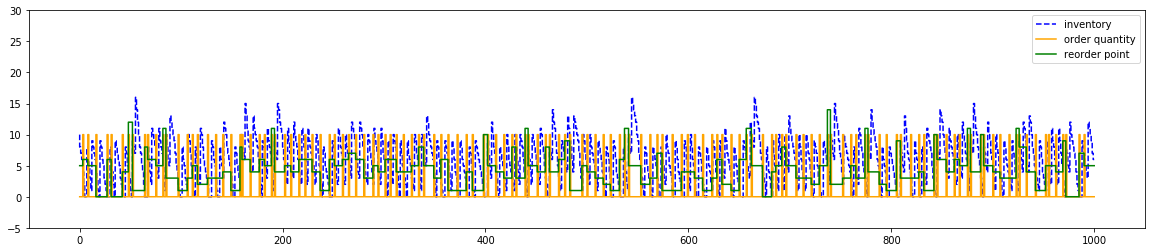

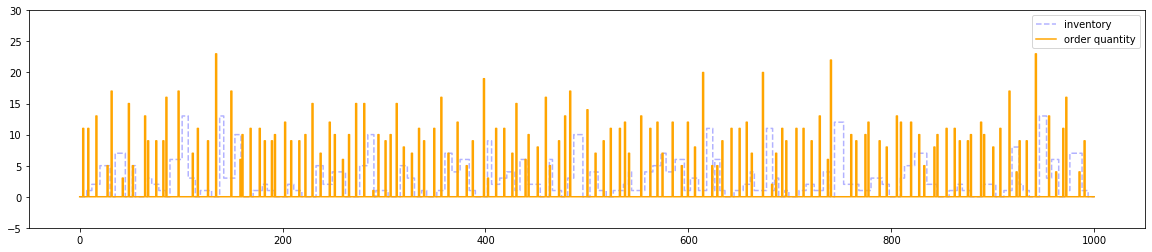

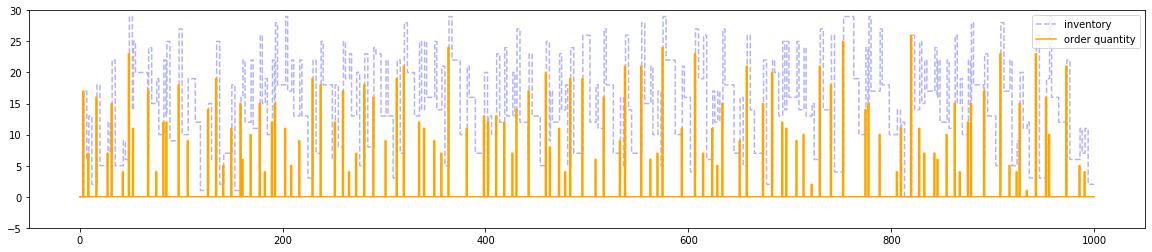

Service Time


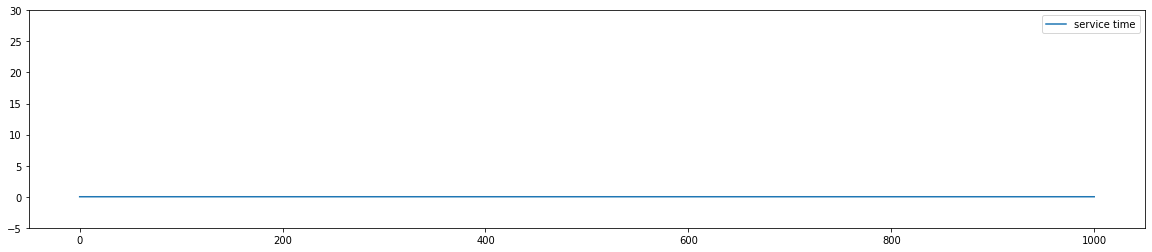

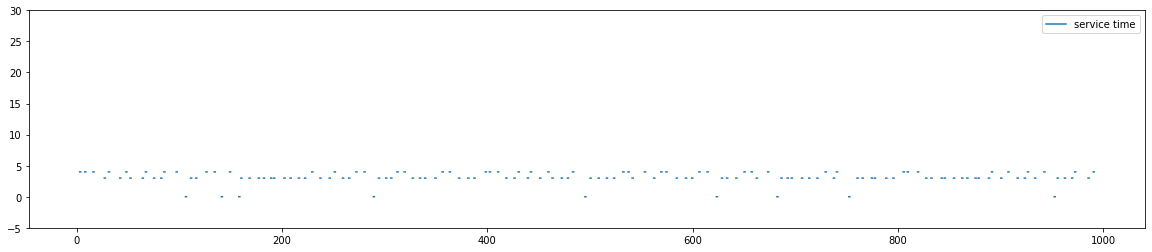

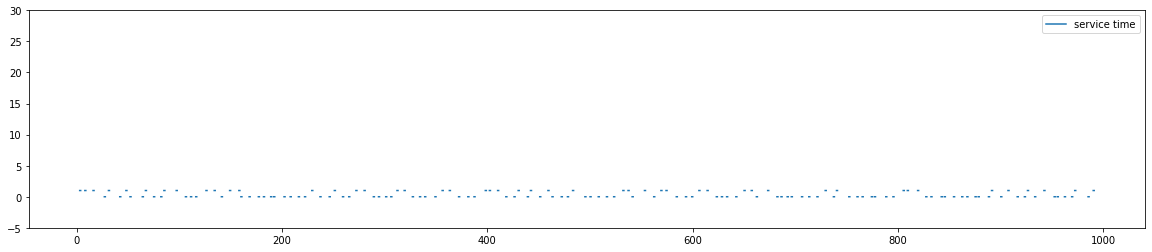

Inventory


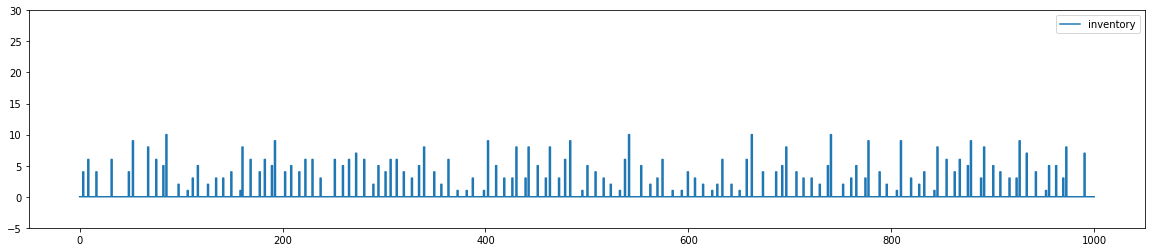

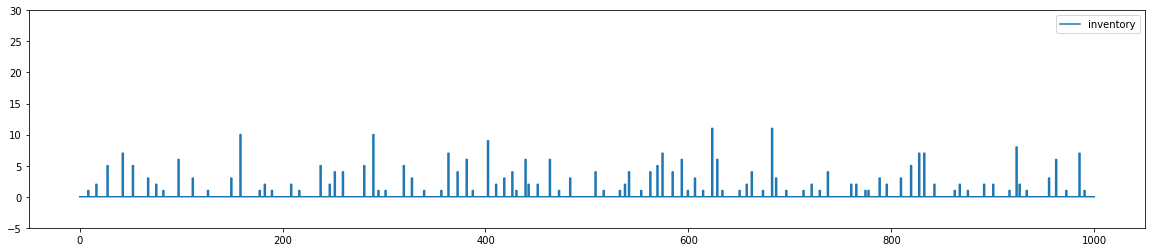

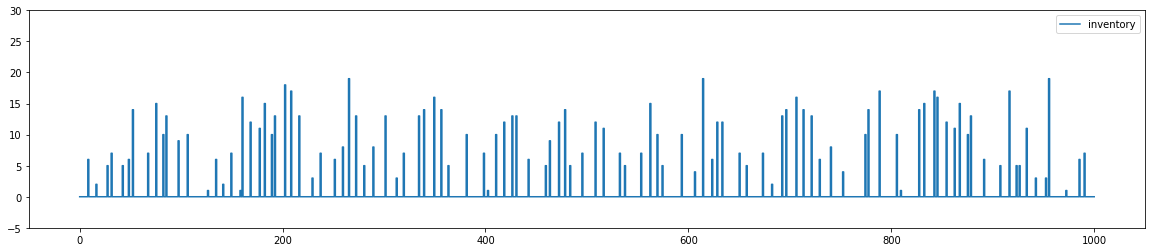

Rewards


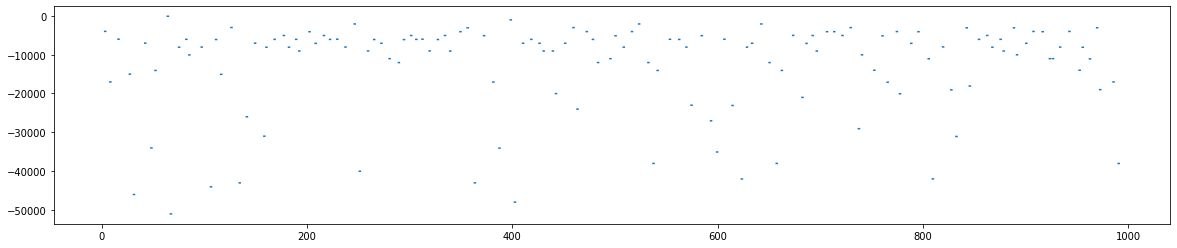

In [15]:
# visualize latest simulation
visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])